# Task 1: Table Booking and Online Delivery

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Dataset .csv')

In [3]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [6]:
df['Country Code'] = df['Country Code'].astype('category')
df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': True, 'No': False})
df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': True, 'No': False})
df['Currency'] = df['Currency'].astype('category')
df['Rating color'] = df['Rating color'].astype('category')
df['Rating text'] = df['Rating text'].astype('category')

In [8]:
df['Cuisines'].fillna('Unknown', inplace=True)

### Determine the percentage of restaurants that offer table booking and online delivery

In [7]:
# Calculate the percentage of restaurants that offer table booking
table_booking_percentage = (df['Has Table booking'].sum() / len(df)) * 100

# Calculate the percentage of restaurants that offer online delivery
online_delivery_percentage = (df['Has Online delivery'].sum() / len(df)) * 100

print("Percentage of Restaurants that Offer Table Booking:", table_booking_percentage)
print("Percentage of Restaurants that Offer Online Delivery:", online_delivery_percentage)

Percentage of Restaurants that Offer Table Booking: 12.124384881164275
Percentage of Restaurants that Offer Online Delivery: 25.662234321013504


### Compare the average ratings of restaurants with table booking and those without.

In [9]:
# Calculate the average rating for restaurants with table booking
average_rating_with_booking = df[df['Has Table booking'] == 1]['Aggregate rating'].mean()

# Calculate the average rating for restaurants without table booking
average_rating_without_booking = df[df['Has Table booking'] == 0]['Aggregate rating'].mean()

print("Average Rating for Restaurants with Table Booking:", average_rating_with_booking)
print("Average Rating for Restaurants without Table Booking:", average_rating_without_booking)

Average Rating for Restaurants with Table Booking: 3.4419689119170984
Average Rating for Restaurants without Table Booking: 2.559358989634219


### Analyze the availability of online delivery among restaurants with different price ranges.

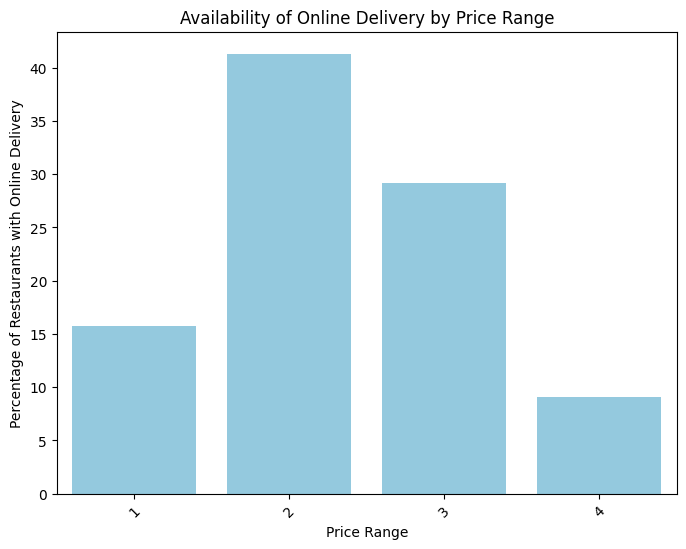

In [10]:
# Group the data by price range and calculate the percentage of restaurants with online delivery
online_delivery_percentage_by_price = df.groupby('Price range')['Has Online delivery'].apply(lambda x: (x == 1).mean() * 100).reset_index()

# Plotting the availability of online delivery among restaurants with different price ranges
plt.figure(figsize=(8, 6))
sns.barplot(x='Price range', y='Has Online delivery', data=online_delivery_percentage_by_price, color='skyblue')
plt.title('Availability of Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation=45)
plt.show()


# Task 2: Price Range Analysis

### Determine the most common price range among all the restaurants.

In [11]:
# Count the occurrences of each price range
price_range_counts = df['Price range'].value_counts()

# Find the most common price range
most_common_price_range = price_range_counts.idxmax()

print("The most common price range among all the restaurants is:", most_common_price_range)

The most common price range among all the restaurants is: 1


In [13]:
df['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

### Calculate the average rating for each price range.

In [14]:
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

print("Average Rating for Each Price Range:")
print(average_rating_by_price_range)

Average Rating for Each Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


### Identify the color that represents the highest average rating among different price ranges.

In [15]:
# Group the data by price range and calculate the mean rating for each group
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

# Find the price range with the highest average rating
highest_average_rating_price_range = average_rating_by_price_range.idxmax()

# Find the color associated with the highest average rating price range
color_for_highest_average_rating = df[df['Price range'] == highest_average_rating_price_range]['Rating color'].iloc[0]

print("The color that represents the highest average rating among different price ranges is:", color_for_highest_average_rating)

The color that represents the highest average rating among different price ranges is: Green


# Task 3: Feature Engineering

### Extract additional features from the existingcolumns, such as the length of the restaurantname or address.

In [16]:
# Extract the length of the restaurant name and address
df['Restaurant Name Length'] = df['Restaurant Name'].apply(lambda x: len(x))
df['Address Length'] = df['Address'].apply(lambda x: len(x))

# Print the DataFrame with the new features
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,False,False,False,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,False,False,False,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,False,False,False,4,4.4,Green,Very Good,270,22,56


### Create new features like "Has Table Booking"or "Has Online Delivery" by encodingcategorical variables.

In [17]:
# Convert categorical variables into binary indicators
df_encoded = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

# Print the DataFrame with the new features
df_encoded.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table booking_True,Has Online delivery_True
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,False,3,4.8,Dark Green,Excellent,314,16,71,True,False
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,False,3,4.5,Dark Green,Excellent,591,16,67,True,False
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,False,4,4.4,Green,Very Good,270,22,56,True,False
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,False,4,4.9,Dark Green,Excellent,365,4,70,False,False
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,False,4,4.8,Dark Green,Excellent,229,11,64,True,False
